In [1]:
# impoart lib
from scipy.io import loadmat
import numpy as np
from sklearn.cluster import *
import random
import scipy.spatial.distance as dist
import math
import matplotlib.pyplot as plt
from sklearn.neural_network import BernoulliRBM
 

In [3]:
num_used = 10000

## load data
raw = loadmat("wind_data.mat")
heights = raw['alt']
rawdata = raw['hvel']

### first, we sample the data for there are too many data points
# and we discard those with value nan

used_data_idx = random.sample(range(len(rawdata)), num_used)
data = []

for i in range(len(rawdata)):
    if i in used_data_idx:
        # chech whther nan is in the data
        flag = True
        for j in rawdata[i]:
            if math.isnan(j):
                flag = False
                continue
        
        ## if not in, add to sample
        if flag and max(rawdata[i]) > 3:
            data.append(rawdata[i])

data = np.array(data)
print(np.shape(data))

(7391, 9)


In [4]:
## Then, we need to normalize the data 
normalized = np.zeros((len(data),len(data[0])))
for i in range(len(data)):
    normalized[i] = data[i]/data[i][0]
print(np.shape(normalized))

(7391, 9)


In [4]:
# ## another preprocess way of the data
# data_slope = np.zeros((len(data),5))
# for i in range(len(data)):
#     data_slope[i][0] = (-data[i][0]+data[i][-1])*5
#     cur_slope = []
#     for j in range(len(data[i])-1):
#         cur_slope.append((data[i][j+1] - data[i][j]))

#     cur_sec_slope = []
#     for k in range(len(cur_slope)-1):
#         cur_sec_slope.append(cur_slope[k+1] - cur_slope[k])
        
#     data_slope[i][1] = (max(cur_slope))
#     data_slope[i][2] = min(cur_slope)
#     data_slope[i][3] = (max(cur_sec_slope))
#     data_slope[i][4] = min(cur_sec_slope)

Next, we use the RBM neuron network to extract featrues. RBM is a unsupervised neuron net work to extract featrue unsupervisely, whici can be used for classification problems. Now I discribe how it works 

In [5]:
## use RBM to extract featrue this is the third way of preprocessing:

## use learing method to do unsupervised learing
## get training and testing data
training_data = []
testing_data = []
training_idx = random.sample(range(len(normalized)),int(len(normalized)*0.8))

for i in range(len(normalized)):
    if i in training_idx:
        training_data.append(normalized[i])
    else:
        testing_data.append(normalized[i])


In [6]:
# ### fit on slope data
# network = BernoulliRBM(n_components = 6, learning_rate=0.01, batch_size=10, n_iter=10, verbose=0, random_state=None)
# network.fit(training_data)

# ## see performance
# score = (network.score_samples(training_data))
# print("training:")
# print( (sum(score**2)/len(score))**0.5 )
# print(sum(score)/len(score))
# print("testing:")
# score_test = network.score_samples(testing_data)
# print( (sum(score_test**2)/len(score_test))**0.5 )
# print(sum(score_test)/len(score_test))

# RBM_data = network.transform(normalized)

training:
1.7323705499806417
-1.7063910518494634
testing:
1.7401155368470873
-1.7164428171330128


After the above two cell, first processed (normalized) data is in variable: data 

second processed (sloped) data is in variable: data_slope

Third processed (Net work) data is in variable: RBM_data


In [5]:
## validation choose a k for k-meanings clustering

error = [0,0]
## this is for the idx is the same as the n_clusters

for i in range(2,20):
    KM = KMeans(n_clusters=i, max_iter=300, n_init=10).fit(normalized)
    error.append(KM.inertia_)

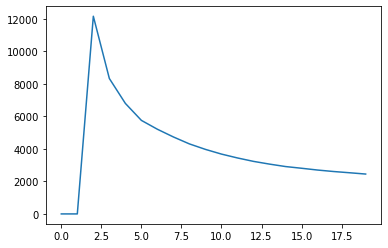

In [6]:
plt.plot(error)

In [7]:
## Therefore, we can chose the n_cluster as 5 we can visualize some of the data
KM = KMeans(n_clusters=5, max_iter=300, n_init=10).fit(normalized)
label = KM.labels_ 

In [8]:
## show the res
# we define a fun to revael very class of result

## para:
# @max_num : shown num
# @the label
# @the class you want to look at
# @raw data
def show_res(max_num,label,cur_label,preprocessed_data):
    global heights
    global data
    
    cur_num = 0
    for i in range(len(label)):
        if label[i] == cur_label:
            cur_num += 1
            plt.subplot(121)
            plt.plot(preprocessed_data[i])
            plt.subplot(122)
            plt.plot(data[i],heights[0])
            
            if cur_num >= max_num:
                break

the left picture is what the classifier receives and the right one is actual data.

c:\users\lenove\appdata\local\programs\python\python37\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


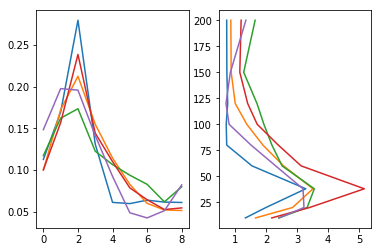

In [11]:
show_res(5,label,0,normalized)

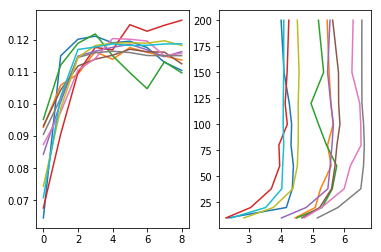

In [12]:
show_res(10,label,1,normalized)

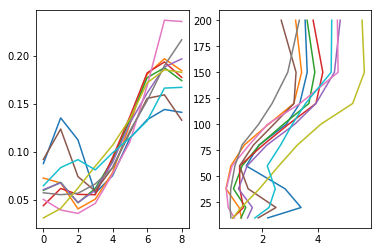

In [13]:
show_res(10,label,2,normalized)

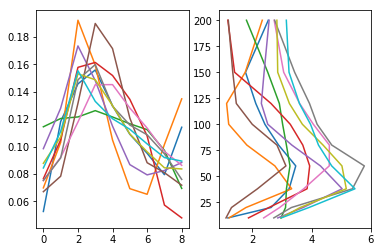

In [14]:
show_res(10,label,3,normalized)

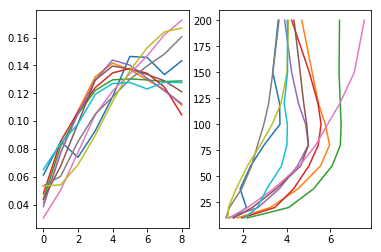

In [15]:
show_res(10,label,4,normalized)

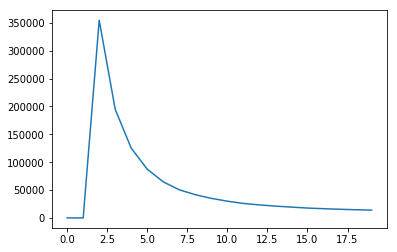

In [16]:
error = [0,0]
for i in range(2,20):
    KM = KMeans(n_clusters=i, max_iter=300, n_init=10).fit(data_slope)
    error.append(KM.inertia_)
plt.plot(error)

In [17]:
KM = KMeans(n_clusters=6, max_iter=300, n_init=10).fit(data_slope)
label = KM.labels_

c:\users\lenove\appdata\local\programs\python\python37\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


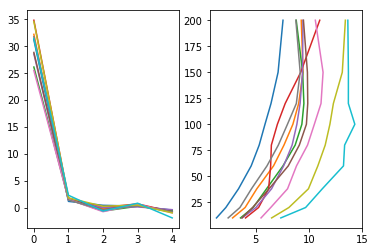

In [18]:
show_res(10,label,0,data_slope)

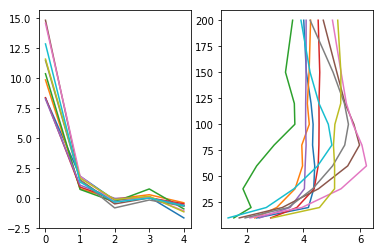

In [19]:
show_res(10,label,1,data_slope)

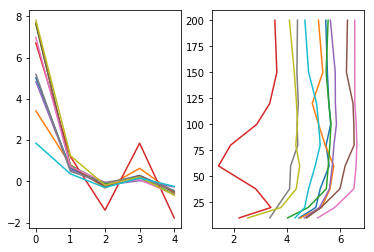

In [20]:
show_res(10,label,2,data_slope)

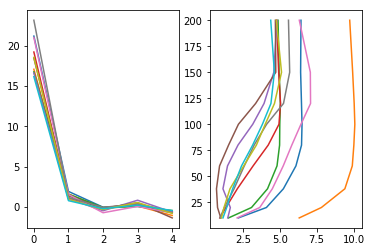

In [21]:
show_res(10,label,3,data_slope)

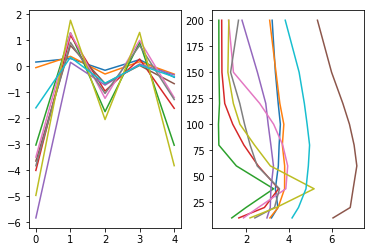

In [22]:
show_res(10,label,4,data_slope)

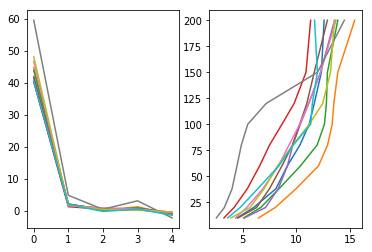

In [23]:
show_res(10,label,5,data_slope)

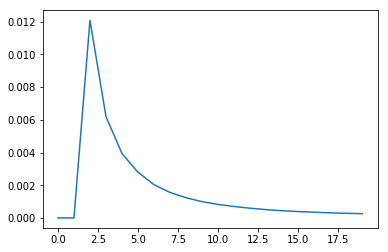

In [24]:
error = [0,0]
for i in range(2,20):
    KM = KMeans(n_clusters=i, max_iter=300, n_init=10).fit(RBM_data)
    error.append(KM.inertia_)
plt.plot(error)

In [25]:
KM = KMeans(n_clusters=6, max_iter=300, n_init=10).fit(RBM_data)
label = KM.labels_

c:\users\lenove\appdata\local\programs\python\python37\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


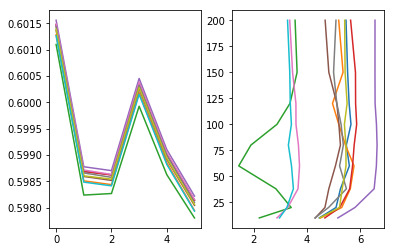

In [26]:
show_res(10,label,0,RBM_data)

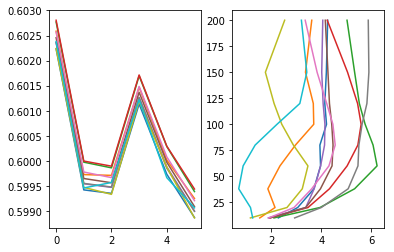

In [27]:
show_res(10,label,1,RBM_data)

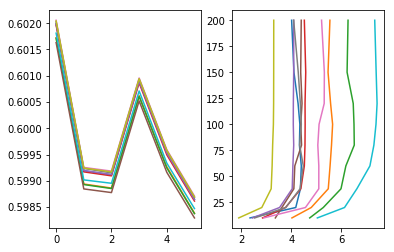

In [28]:
show_res(10,label,2,RBM_data)

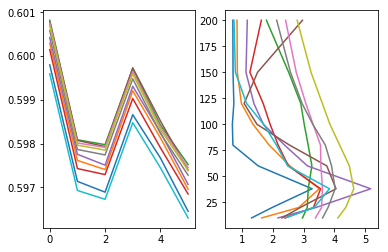

In [29]:
show_res(10,label,3,RBM_data)

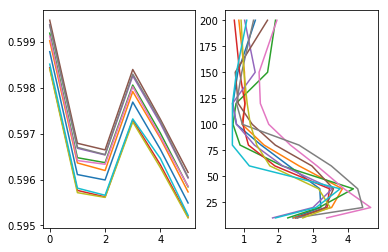

In [30]:
show_res(10,label,4,RBM_data)

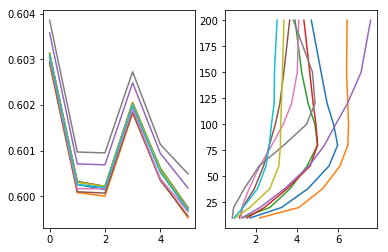

In [31]:
show_res(10,label,5,RBM_data)

In [32]:
def kMeans(data,K,niter):
    # ini
    maxkind = np.zeros(len(data))
    # a vector of length N containing which cluster ( 0,…,𝐾−1 ) a feature vector is in
    curps = random.sample(list(data),K)
    nextps = curps
    #centers
    for i in range(niter):
        # each time is a iter which changes the curp to nextp
        # change belong to curp
        # and generate nextp
        # fisrt, change the curp
        curps = nextps
        # print(curps)
        # change the belong accordingly
        distance = dist.cdist(data, curps)
        # print(distance[0:10])
        minkind = np.argmin(distance,axis = 1)
        # print(minkind[0:10])
        # gen next p 
        number = np.zeros(K)
        nextps = np.zeros(np.shape(nextps))
        for j in range(K):
            for q in range(len(data)):
                if minkind[q] == j:
                    cur_dis = sum((data[q]-curps[j])**2)
                    nextps[j] += data[q] * cur_dis**2
                    number[j] +=  cur_dis ** 2

        for j in range(K):
            if number[j] ==0:
                nextps[j] = curps[j]
            nextps[j] = nextps[j] / number[j]

    return (minkind,curps)

In [33]:
label , _ = kMeans(RBM_data,6,300)

In [34]:
num_class = 6
classes = np.zeros(num_class)
for i in label:
    classes[i] += 1
    
classes    

array([4.968e+03, 1.375e+03, 9.270e+02, 2.800e+01, 1.570e+02, 2.000e+00])

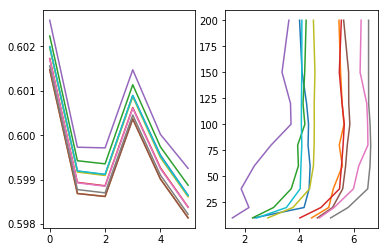

In [35]:
show_res(10,label,0,RBM_data)

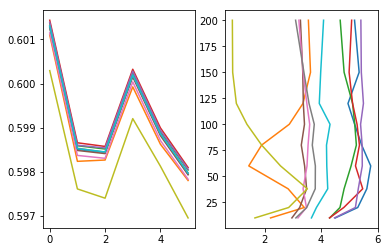

In [36]:
show_res(10,label,1,RBM_data)

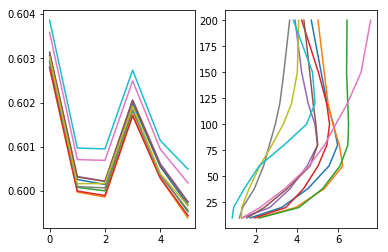

In [37]:
show_res(10,label,2,RBM_data)

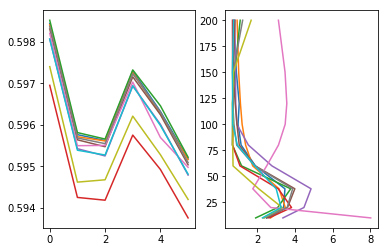

In [38]:
show_res(10,label,3,RBM_data)

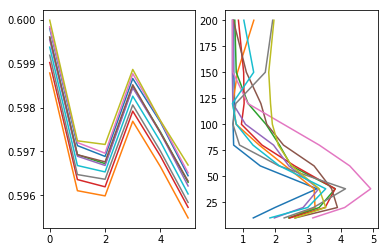

In [39]:
show_res(10,label,4,RBM_data)

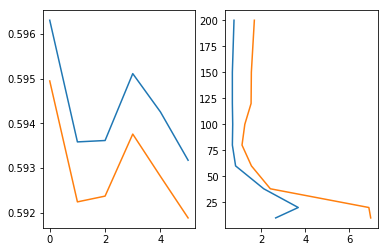

In [40]:
show_res(10,label,5,RBM_data)